# test 3 var plotting in r

In [31]:
library(reshape2)
library(circlize)

In [32]:
# load data
pdf("plots.pdf")

load("LCdist_ME_DNA_9.RData")# oceanic distance
load("sp.sim_ME_surf_DNA_Jaccard.RData") # species similarity
# convert dist object to dataframe
df_distance <- melt(as.matrix(LCdist_ME_DNA_9), varnames = c("row", "col"))
df_distance1 <- df_distance[duplicated(df_distance$value), ]# remove duplicates
#chord plot
hhh <- chordDiagram(df_distance1, symmetric=TRUE)

dev.off() 

pdf 
  2

In [33]:
ggsave("Chord02.pdf")

Saving 7 x 7 in image


ERROR: Error in FUN(X[[i]], ...): object 'sim' not found


In [34]:
#install.packages('network')

In [35]:
library(network)

In [58]:
df_sim <- melt(as.matrix(sp.sim_ME_surf_DNA_Jaccard), varnames = c("row", "col"))
df_sim$value <- 1- df_sim$value
head(df_distance, n=10)
head(df_sim, n=10)

,row,col,value,sim,simcol
,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,1,0,0.0000000,#FF0000
2,2,1,2403,0.8427753,#7C52F1
3,3,1,4168,0.8386876,#7D53F0
4,4,1,7597,0.7952946,#8C63EC
5,5,1,10709,0.8473995,#7A50F1
6,6,1,16434,0.8783225,#6E44F4
7,7,1,15616,0.8639917,#744AF3
8,8,1,11923,0.8148361,#855CEE
9,9,1,5252,0.8316980,#8056F0


,row,col,value
,<fct>,<fct>,<dbl>
1,...24,...24,1.0000000
2,...30,...24,0.1572247
3,...35,...24,0.1613124
4,...39,...24,0.2047054
5,...43,...24,0.1526005
6,...10,...24,0.1216775
7,...11,...24,0.1360083
8,...16,...24,0.1851639
9,...23,...24,0.1683020


In [37]:
palette()
library(cowplot)

[1] "black"   "red"     "green3"  "blue"    "cyan"    "magenta" "yellow" 
[8] "gray"

In [38]:
#install.packages("fields") #?as.color

In [39]:
library(fields)
library(tidyverse)
library(scales)

In [117]:

pdf("zeropointonetozeropointthreeplots.pdf")

values <- df_sim$value
values <- seq(0.1,0.3,len=100)
## Use n equally spaced breaks to assign each value to n-1 equal sized bins 
ii <- cut(values, breaks = seq(0.1, 0.3, len = 100), 
          include.lowest = TRUE)
## Use bin indices, ii, to select color from vector of n-1 equally spaced colors
colors <- colorRampPalette(c("blue", "red"))(99)[ii]
head(colors)
## This call then also produces the plot below
image(seq_along(values), 1, as.matrix(seq_along(values)), col=colors,
      axes=FALSE, xlab="", ylab="")

dev.off()

[1] "#0000FF" "#0000FF" "#0200FC" "#0500F9" "#0700F7" "#0A00F4"

pdf 
  2

In [118]:
values <- df_sim$value

## Use n equally spaced breaks to assign each value to n-1 equal sized bins 
ii <- cut(values, breaks = seq(0.1, 0.3, len = 100), 
          include.lowest = TRUE)
## Use bin indices, ii, to select color from vector of n-1 equally spaced colors
colorsSIM <- colorRampPalette(c("blue", "red"))(99)[ii]
head(colorsSIM)

[1] NA        "#4800B6" "#4E00B0" "#84007A" "#4300BB" "#1A00E4"

In [40]:
trans <- div_gradient_pal(low="red", high="blue", space="Lab")

[1] NA        "#4800B6" "#4E00B0" "#84007A" "#4300BB" "#1A00E4"

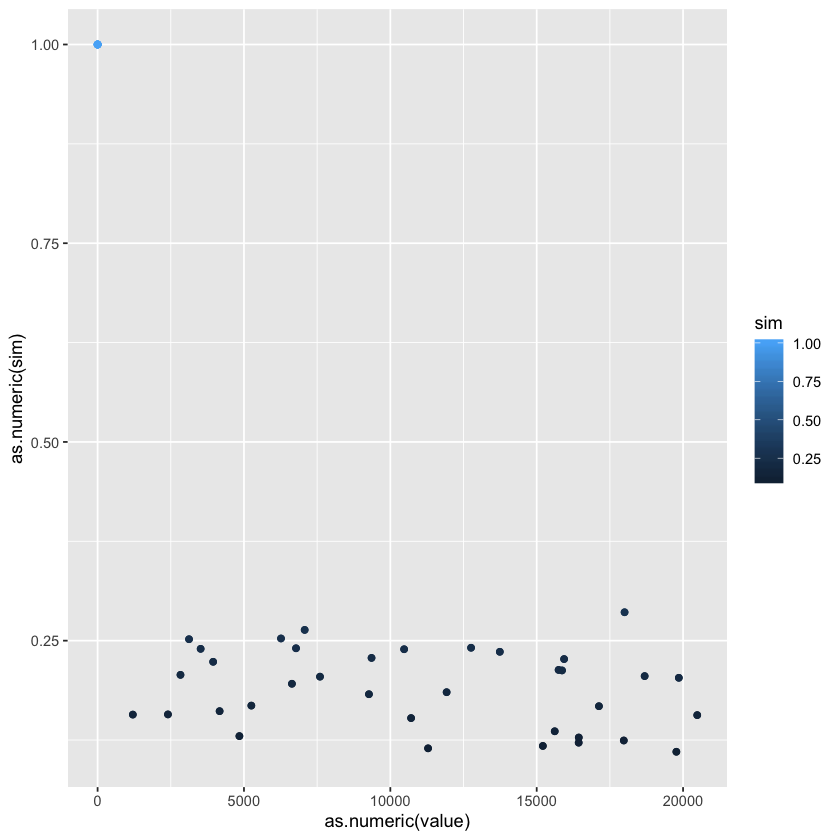

In [108]:
cols <- trans(as.numeric(df_sim$value))


#colscale <- trans(seq(0.1,.3, length.out=50))
#plot(.1:.3, .1:.3, col=colscale)


#ggplot(data=df_distance)+geom_point(aes(x=as.numeric(value), y=as.numeric(sim), col=colscale))+
#scale_color_identity()+ theme_cowplot(12)

values <- df_sim$value
## Use n equally spaced breaks to assign each value to n-1 equal sized bins 
ii <- cut(values, breaks = seq(0.1, 0.3, len = 100), 
          include.lowest = TRUE)
## Use bin indices, ii, to select color from vector of n-1 equally spaced colors
colors2 <- colorRampPalette(c("blue", "red"))(99)[ii]
head(colors2)


ggplot(data=df_distance)+geom_point(aes(x=as.numeric(value), y=as.numeric(sim), col=sim))+
#scale_color_gradient(low='red', high = 'blue', space='Lab', limits=c(0.1,.3))+ theme_cowplot(12)
scale_fill_manual(values = colors2)

In [42]:
ggsave("ColorScaleTest.pdf")

Saving 7 x 7 in image


ERROR: Error in FUN(X[[i]], ...): object 'sim' not found


In [60]:
simCOLS <- as.color(as.numeric(df_sim$value))

In [61]:
simCOLS2 <- as.color(as.integer(df_sim$value*1000))

In [62]:
df_distance$sim <- df_sim$value

In [119]:
df_distance$simcol <- colorsSIM

In [120]:
head(df_distance)
write.csv(df_distance,"SimDistColors2.csv", row.names = FALSE)

,row,col,value,sim,simcol
,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,1,0,1.0000000,NA
2,2,1,2403,0.1572247,#4800B6
3,3,1,4168,0.1613124,#4E00B0
4,4,1,7597,0.2047054,#84007A
5,5,1,10709,0.1526005,#4300BB
6,6,1,16434,0.1216775,#1A00E4


In [48]:
# Generate a plot of color names which R knows about.
#++++++++++++++++++++++++++++++++++++++++++++
# cl : a vector of colors to plots
# bg: background of the plot
# rot: text rotation angle
#usage=showCols(bg="gray33")
showCols <- function(cl=colors(), bg = "grey",
                     cex = 0.75, rot = 30) {
    m <- ceiling(sqrt(n <-length(cl)))
    length(cl) <- m*m; cm <- matrix(cl, m)
    require("grid")
    grid.newpage(); vp <- viewport(w = .92, h = .92)
    grid.rect(gp=gpar(fill=bg))
    grid.text(cm, x = col(cm)/m, y = rev(row(cm))/m, rot = rot,
              vp=vp, gp=gpar(cex = cex, col = cm))
  }

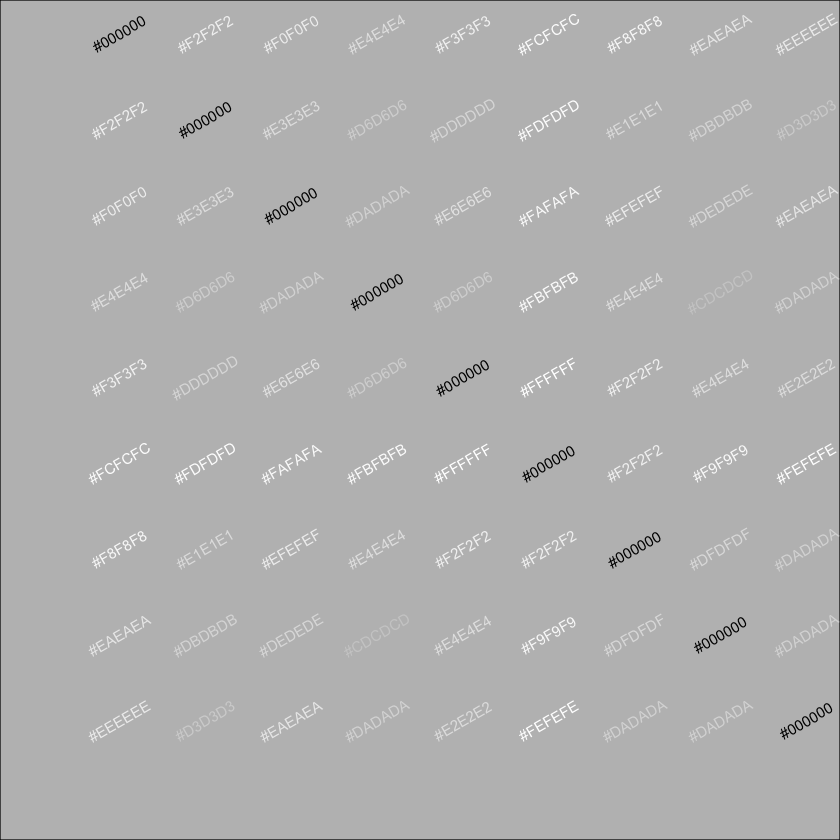

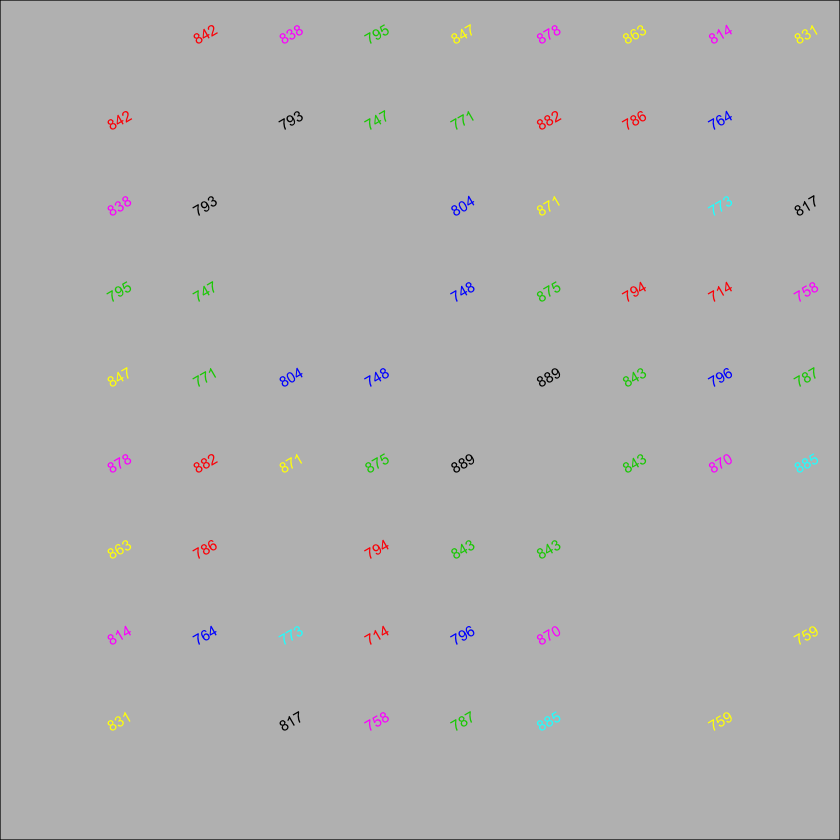

In [49]:
showCols(simCOLS)
showCols(simCOLS2)